***
***
# 使用GraphLab进行电影推荐
***
***


In [3]:
import graphlab
graphlab.canvas.set_target("ipynb")
# set canvas to show sframes and sgraphs in ipython notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# download data from: http://files.grouplens.org/datasets/movielens/ml-1m.zip

In [5]:
data = graphlab.SFrame.read_csv('/Users/chengjun/bigdata/ml-1m/ratings.dat', delimiter='\n', 
                                header=False)['X1'].apply(lambda x: x.split('::')).unpack()
for col in data.column_names():
    data[col] = data[col].astype(int)
data.rename({'X.0': 'user_id', 'X.1': 'movie_id', 'X.2': 'rating', 'X.3': 'timestamp'})
data.save('ratings')

users = graphlab.SFrame.read_csv('/Users/chengjun/bigdata/ml-1m/users.dat', delimiter='\n', 
                                 header=False)['X1'].apply(lambda x: x.split('::')).unpack()
users.rename({'X.0': 'user_id', 'X.1': 'gender', 'X.2': 'age', 'X.3': 'occupation', 'X.4': 'zip-code'})
users['user_id'] = users['user_id'].astype(int)
users.save('users')

items = graphlab.SFrame.read_csv('/Users/chengjun/bigdata/ml-1m/movies.dat', delimiter='\n', 
                                 header=False)['X1'].apply(lambda x: x.split('::')).unpack()
items.rename({'X.0': 'movie_id', 'X.1': 'title', 'X.2': 'genre'})
items['movie_id'] = items['movie_id'].astype(int)
items.save('items')

PROGRESS: Finished parsing file /Users/chengjun/bigdata/ml-1m/ratings.dat
PROGRESS: Parsing completed. Parsed 100 lines in 0.419473 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /Users/chengjun/bigdata/ml-1m/ratings.dat
PROGRESS: Parsing completed. Parsed 1000209 lines in 0.516456 secs.
PROGRESS: Finished parsing file /Users/chengjun/bigdata/ml-1m/users.dat
PROGRESS: Parsing completed. Parsed 100 lines in 0.029414 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argume

In [8]:
data.show()

In [9]:
items.head()

movie_id,title,genre
1,Toy Story (1995),Animation|Children's|Comedy ...
2,Jumanji (1995),Adventure|Children's|Fantasy ...
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride PartII (1995) ...,Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children's
9,Sudden Death (1995),Action
10,GoldenEye (1995),Action|Adventure|Thriller


In [10]:
data = data.join(items, on='movie_id')

In [11]:
data

user_id,movie_id,rating,timestamp,title,genre
1,1193,5,978300760,One Flew Over theCuckoo's Nest (1975) ...,Drama
1,661,3,978302109,James and the Giant Peach(1996) ...,Animation|Children's|Musical ...
1,914,3,978301968,My Fair Lady (1964),Musical|Romance
1,3408,4,978300275,Erin Brockovich (2000),Drama
1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy ...
1,1197,3,978302268,"Princess Bride, The(1987) ...",Action|Adventure|Comedy|Romance ...
1,1287,5,978302039,Ben-Hur (1959),Action|Adventure|Drama
1,2804,5,978300719,"Christmas Story, A (1983)",Comedy|Drama
1,594,4,978302268,Snow White and the SevenDwarfs (1937) ...,Animation|Children's|Musical ...
1,919,4,978301368,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical ...


In [27]:
(train_set, test_set) = data.random_split(0.95, seed=1)

In [33]:
m = graphlab.recommender.create(train_set, 'user_id', 'movie_id', 'rating')

PROGRESS: Recsys training: model = ranking_factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 949852 observations with 6040 users and 3701 items.
PROGRESS:     Data prepared in: 1.38442s
PROGRESS: Training ranking_factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 32       |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 1e-09    |
PROGRESS: | solver                         | Solver used for training                         | adagrad  |
PROGRESS: | linear_regularization          | L2 Regularization on Lin

In [29]:
m

Class                           : ItemSimilarityRecommender

Schema
------
User ID                         : user_id
Item ID                         : movie_id
Target                          : None
Additional observation features : 0
Number of user side features    : 0
Number of item side features    : 0

Statistics
----------
Number of observations          : 949852
Number of users                 : 6040
Number of items                 : 3701

Training summary
----------------
Training time                   : 0.7314

Settings
--------
only_top_k                      : 100
similarity_type                 : jaccard
threshold                       : 0.001
training_method                 : auto

In [38]:
m2 = graphlab.item_similarity_recommender.create(train_set, 'user_id', 'movie_id', 'rating',
                                 similarity_type='pearson')

PROGRESS: Recsys training: model = item_similarity
PROGRESS: Warning: Ignoring columns timestamp, title, genre;
PROGRESS:     To use these columns in scoring predictions, use a model that allows the use of additional features.
PROGRESS: Preparing data set.
PROGRESS:     Data has 949852 observations with 6040 users and 3701 items.
PROGRESS:     Data prepared in: 0.741166s
PROGRESS: Computing item similarity statistics:
PROGRESS: Computing most similar items for 3701 items:
PROGRESS: +-----------------+-----------------+
PROGRESS: | Number of items | Elapsed Time    |
PROGRESS: +-----------------+-----------------+
PROGRESS: | 1000            | 0.502444        |
PROGRESS: | 2000            | 0.525984        |
PROGRESS: | 3000            | 0.547989        |
PROGRESS: +-----------------+-----------------+
PROGRESS: Finished training in 0.782624s
PROGRESS: Finished prediction in 0.688922s


In [39]:
m2

Class                           : ItemSimilarityRecommender

Schema
------
User ID                         : user_id
Item ID                         : movie_id
Target                          : rating
Additional observation features : 0
Number of user side features    : 0
Number of item side features    : 0

Statistics
----------
Number of observations          : 949852
Number of users                 : 6040
Number of items                 : 3701

Training summary
----------------
Training time                   : 0.7828

Settings
--------
only_top_k                      : 100
similarity_type                 : pearson
threshold                       : 0.001
training_method                 : auto

compare_models: using 562 users to estimate model performance
PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+------------------+
| cutoff |  mean_precision |   mean_recall    |
+--------+-----------------+------------------+
|   2    | 0.0435943060498 | 0.00956472275563 |
|   4    | 0.0333629893238 | 0.0148154269344  |
|   6    | 0.0308422301305 | 0.0200992907447  |
|   8    | 0.0289145907473 | 0.0259425986711  |
|   10   | 0.0274021352313 | 0.0287214600249  |
|   12   | 0.0260972716489 | 0.0337773113572  |
|   14   | 0.0263091001525 | 0.0394111159869  |
|   16   | 0.0256895017794 | 0.0462196778187  |
|   18   | 0.0250098853302 |  0.050977761984  |
|   20   | 0.0248220640569 | 0.0552180941837  |
+--------+-----------------+------------------+
[10 rows x 3 columns]


Overall RMSE:  0.906418088677

Per User RMSE (best)
+---------+-------+-----------------+
| user_id | count |       rmse      |
+---------+-------+----------------

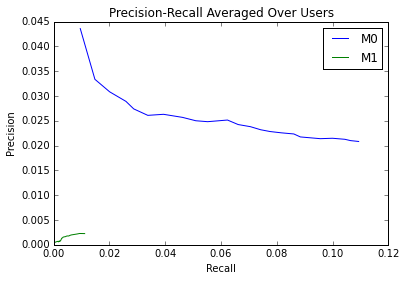

In [40]:
result = graphlab.recommender.util.compare_models(test_set, [m, m2],
                                            user_sample=.1, skip_set=train_set)

### Getting similar items

In [41]:
m.get_similar_items([1287])  # movie_id is Ben-Hur

PROGRESS: Getting similar items completed in 0.002226


movie_id,similar,distance,rank
1287,3087,1.65043520927,1
1287,54,1.64714694023,2
1287,3473,1.64681369066,3
1287,2690,1.64273333549,4
1287,2014,1.63784432411,5
1287,1950,1.63471919298,6
1287,585,1.63432335854,7
1287,1265,1.62446278334,8
1287,1919,1.62326407433,9
1287,566,1.61960405111,10


In [42]:
m.get_similar_items([1287]).join(items, on={'similar': 'movie_id'}).sort('rank')

PROGRESS: Getting similar items completed in 0.001121


movie_id,similar,distance,rank,title,genre
1287,3087,1.65043520927,1,Scrooged (1988),Comedy
1287,54,1.64714694023,2,"Big Green, The (1995)",Children's|Comedy
1287,3473,1.64681369066,3,Jonah Who Will Be 25 inthe Year 2000 (1976) ...,Comedy
1287,2690,1.64273333549,4,"Ideal Husband, An (1999)",Comedy
1287,2014,1.63784432411,5,Freaky Friday (1977),Children's|Comedy
1287,1950,1.63471919298,6,In the Heat of the Night(1967) ...,Drama|Mystery
1287,585,1.63432335854,7,"Brady Bunch Movie, The(1995) ...",Comedy
1287,1265,1.62446278334,8,Groundhog Day (1993),Comedy|Romance
1287,1919,1.62326407433,9,Madeline (1998),Children's|Comedy
1287,566,1.61960405111,10,Naked in New York (1994),Comedy|Romance


### Making recommendations

In [43]:
recs = m.recommend()

PROGRESS: recommendations finished on 1000/6040 queries. users per second: 7602.42
PROGRESS: recommendations finished on 2000/6040 queries. users per second: 8142.83
PROGRESS: recommendations finished on 3000/6040 queries. users per second: 8330.83
PROGRESS: recommendations finished on 4000/6040 queries. users per second: 8446.43
PROGRESS: recommendations finished on 5000/6040 queries. users per second: 8504.6
PROGRESS: recommendations finished on 6000/6040 queries. users per second: 8163.45


In [44]:
recs

user_id,movie_id,score,rank
1,356,4.04209059737,1
1,34,4.03408827148,2
1,480,4.00319579504,3
1,2081,3.94718419276,4
1,377,3.92856887243,5
1,2987,3.927424426,6
1,590,3.89587930105,7
1,1387,3.88266849778,8
1,741,3.87735148034,9
1,2006,3.87439003847,10


In [45]:
data[data['user_id'] == 4].join(items, on='movie_id')

user_id,movie_id,rating,timestamp,title,genre
4,260,5,978294199,Star Wars: Episode IV - ANew Hope (1977) ...,Action|Adventure|Fantasy|Sci-Fi ...
4,480,4,978294008,Jurassic Park (1993),Action|Adventure|Sci-Fi
4,1036,4,978294282,Die Hard (1988),Action|Thriller
4,1097,4,978293964,E.T. the Extra-Terrestrial (1982) ...,Children's|Drama|Fantasy|Sci-Fi ...
4,1196,2,978294199,Star Wars: Episode V -The Empire Strikes Back ...,Action|Adventure|Drama|Sci-Fi|War ...
4,1198,5,978294199,Raiders of the Lost Ark(1981) ...,Action|Adventure
4,1201,5,978294230,"Good, The Bad and TheUgly, The (1966) ...",Action|Western
4,1210,3,978293924,Star Wars: Episode VI -Return of the Jedi (1 ...,Action|Adventure|Romance|Sci-Fi|War ...
4,1214,4,978294260,Alien (1979),Action|Horror|Sci-Fi|Thriller ...
4,1240,5,978294260,"Terminator, The (1984)",Action|Sci-Fi|Thriller


In [46]:
m.recommend(users=[4], k=20).join(items, on='movie_id')

user_id,movie_id,score,rank,title,genre
4,34,4.14169768132,1,Babe (1995),Children's|Comedy|Drama
4,317,3.88899993039,15,"Santa Clause, The (1994)",Children's|Comedy|Fantasy
4,531,3.86152254678,18,"Secret Garden, The (1993)",Children's|Drama
4,590,4.12568046785,2,Dances with Wolves (1990),Adventure|Drama|Western
4,741,3.90859223045,12,Ghost in the Shell(Kokaku kidotai) (1995) ...,Animation|Sci-Fi
4,969,3.92384021617,9,"African Queen, The (1951)",Action|Adventure|Romance|War ...
4,1012,3.91079562045,11,Old Yeller (1957),Children's|Drama
4,1013,3.84667891897,19,"Parent Trap, The (1961)",Children's|Drama
4,1017,3.86540279425,17,Swiss Family Robinson(1960) ...,Adventure|Children's
4,1204,3.98675022162,5,Lawrence of Arabia (1962),Adventure|War


In [47]:
m.recommend?

### Recommendations for new users

In [48]:
recent_data = graphlab.SFrame()
recent_data['movie_id'] = [1291] 
recent_data['user_id'] = 99999

In [51]:
m2.recommend(users=[99999], new_observation_data=recent_data).join(items, on='movie_id').sort('rank')

user_id,movie_id,score,rank,title,genre
99999,1830,5.0,1,Follow the Bitch (1998),Comedy
99999,572,5.0,2,Foreign Student (1994),Drama
99999,3607,5.0,3,One Little Indian (1973),Comedy|Drama|Western
99999,989,5.0,4,Schlafes Bruder (Brotherof Sleep) (1995) ...,Drama
99999,3172,5.0,5,Ulysses (Ulisse) (1954),Adventure
99999,3233,5.0,6,Smashing Time (1967),Comedy
99999,3382,5.0,7,Song of Freedom (1936),Drama
99999,787,5.0,8,"Gate of Heavenly Peace,The (1995) ...",Documentary
99999,3656,5.0,9,Lured (1947),Crime
99999,3280,5.0,10,"Baby, The (1973)",Horror


### Saving and loading models

In [ ]:
m.save('my_model')

In [ ]:
m_again = graphlab.load_model('my_model')

In [ ]:
m_again